# Softmax Regression Implementation from Scratch (Section 4.4)
Implement a ‘cross entropy‘ function that follows the definition of the cross-entropy loss function Sigmai yi log yhati
- A. Try it out in the code example of this section.
- B. Why do you think it runs more slowly?
- C. Should you use it? When would it make sense to?
- D. What do you need to be careful of? Hint: consider the domain of the logarithm.

In [ ]:
!pip install d2l==1.0.3
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt



Elapsed time: 126.26645302772522 seconds


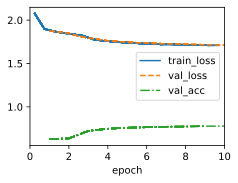

In [3]:
import time
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp/partition

class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()


data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
start_time = time.time()
trainer.fit(model, data)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


# **A. Implement the new cross entopy function.**

Elapsed time: 140.3791172504425 seconds


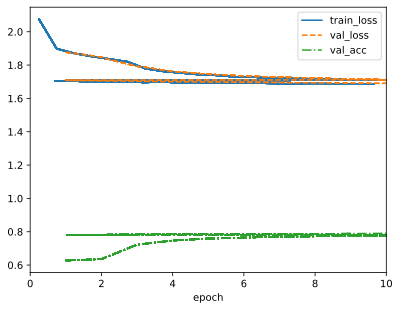

In [4]:
def cross_entropy(y_hat, y):
    l = torch.matmul(y.type(torch.float32),torch.log(y_hat))
    return l.mean()

class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, (num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

    def forward(self, X):
        X = X.reshape((-1, self.W.shape[0]))
        return softmax(torch.matmul(X, self.W)+self.b)

    def loss(self, y_hat, y):
        return cross_entropy(y_hat, y)


data = d2l.FashionMNIST(batch_size=256)
start_time = time.time()
trainer.fit(model, data)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

**B. Why do you think it runs more slowly?**

The new cross entropy loss function requires elementwise matrix multiplication, which is much more computationally complex and time consuming.

**C. Should you use it? When would it make sense to?**

It may only make sense to use this for educational and learning purposes. The d2l and torch libraries contain optimized functions for computing cross entropy that are much more efficient, so those are better to use in general.

**D. What do you need to be careful of? Hint: consider the domain of the logarithm.**

The logarithm function is undefined for zero or negative values, which can cause issues. To prevent this, we can clip predicted probabilities with a small positive value or add a small constant to them before taking the logarithm.